In [1]:
# https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html

In [5]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)
import cv2

In [3]:
# !wget https://imagemagick.org/Usage/img_photos/zelda3_orig.png

--2022-10-26 14:02:01--  https://imagemagick.org/Usage/img_photos/zelda3_orig.png
Resolving imagemagick.org (imagemagick.org)... 50.251.58.13
Connecting to imagemagick.org (imagemagick.org)|50.251.58.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54752 (53K) [image/png]
Saving to: ‘zelda3_orig.png’

zelda3_orig.png     100%[===================>]  53.47K   132KB/s    in 0.4s    

2022-10-26 14:02:02 (132 KB/s) - ‘zelda3_orig.png’ saved [54752/54752]



(128, 128)

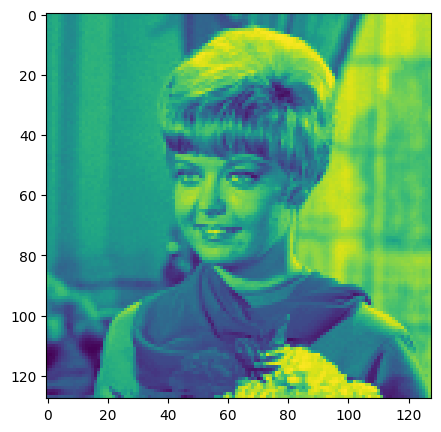

In [29]:
im = cv2.imread("zelda.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
f = plt.figure(figsize=(5,5))
plt.imshow(im)
im.shape

In [11]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [30]:
im = im[:,:].astype(float)
imsize = im.shape
print(imsize)
dct = np.zeros(imsize[:2])

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

(128, 128)


In [18]:
# im

In [21]:
# plt.imshow(dct)

/tmp/ipykernel_257843/4145118948.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
/tmp/ipykernel_257843/4145118948.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')


Text(0.5, 1.0, 'An 8x8 DCT block')

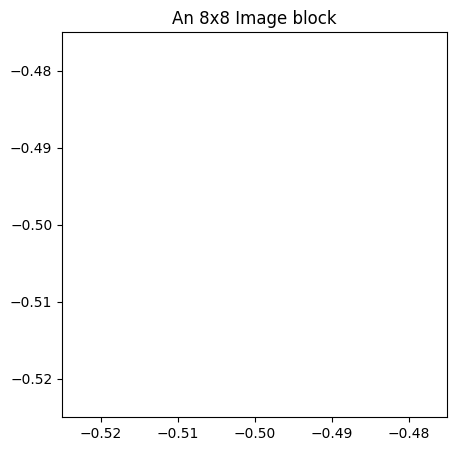

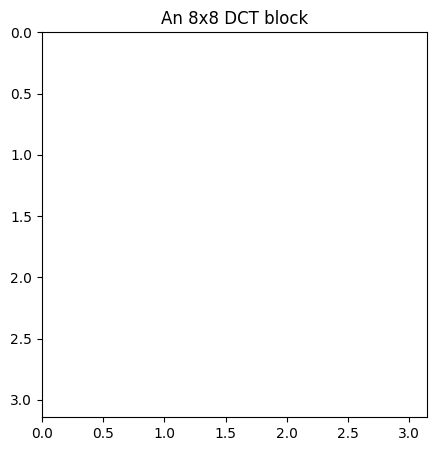

In [33]:

pos = 128

# Extract a block from image
plt.figure(figsize=(5,5))
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure(figsize=(5,5))
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Text(0.5, 1.0, '8x8 DCTs of the image')

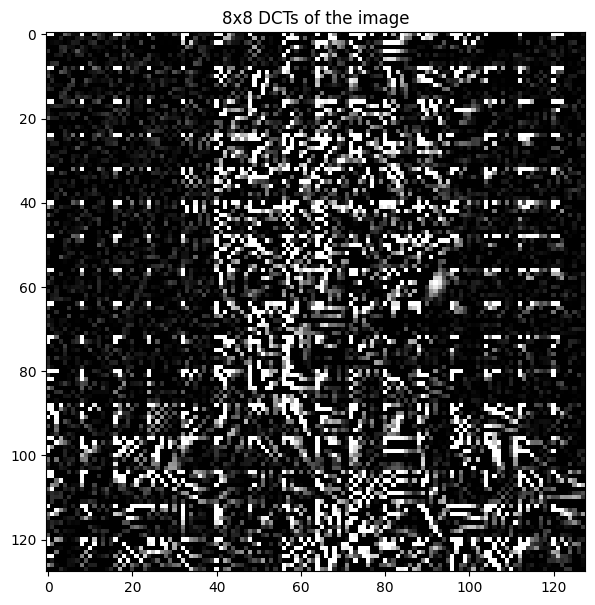

In [34]:

# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

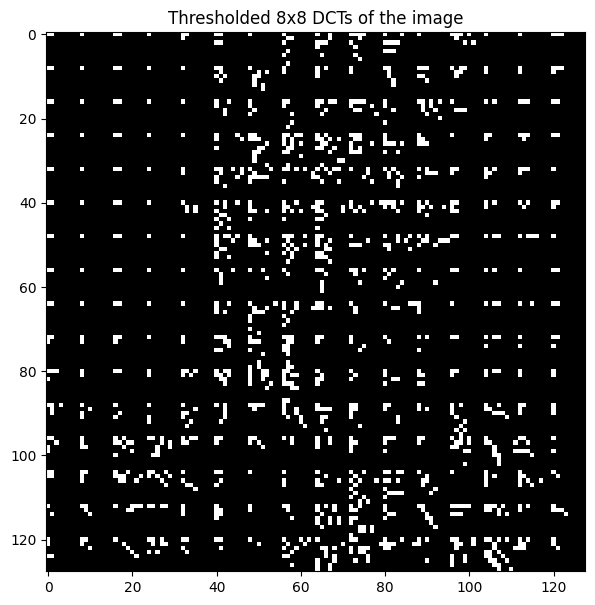

In [36]:

# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

# print "Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0)

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

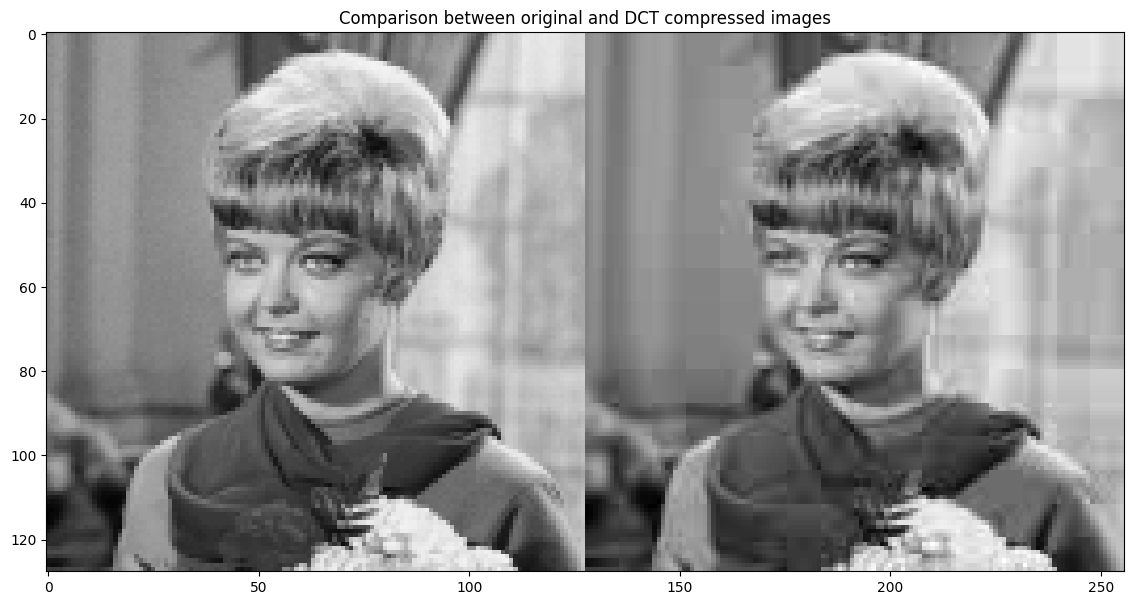

In [37]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )